# Auswertung Automatisierungstechnik Bonuspraktikum 1

In [111]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd
import numpy as np
import os
from glob import glob

from scipy.interpolate import interp1d

DATA_PATH = os.path.join(os.getcwd(), 'data')

def read_channels_data(channels:list, start:float, end:float) -> pd.DataFrame:
    df = pd.DataFrame()
    for i, channel in enumerate(channels):
        col_name = f'channel {i+1}'
        channel_df = pd.read_csv(channel, skiprows=18, names=[0,1,'time', col_name,2])
        channel_df['time'] = pd.to_timedelta(channel_df['time'], unit='s')
        channel_df.index = channel_df['time']
        channel_df = channel_df[col_name]
        df = pd.concat([df, channel_df], axis=1, ignore_index=False)
    
    # rename channels
    # channel 1 Stellgröße
    # channel 2 MD
    # channel 3 as points -> "berechnete" Soll-Wert
    # channel 4 externer Trigger
    df = df.rename(columns={"channel 1" : "Stellgröße",
                            "channel 2" : "Measured Distance (MD)",
                            "channel 3" : "Sollwert",
                            "channel 4" : "Externer Trigger"})
    
    # only keep data in range start to end
    start = pd.Timedelta(seconds=start)
    end = pd.Timedelta(seconds=end)
    df = df.loc[start:end]

    # plot the data with matplotlib
    cols = df.columns
    df['time'] = df.index
    df['time'] = df['time'].apply(lambda x: x.total_seconds())
    df.index = df['time']
    return df[cols]

def interpolate_df(df):
    df_interpol = pd.DataFrame()
    f = [interp1d(df.index, df[x]) for x in df.columns]

    start, end = min(df.index.to_list()), max(df.index.to_list())
    new_index = np.arange(start, end, step=0.003)

    for i, col in enumerate(df.columns):
        df_interpol[col] = f[i](new_index)
    df_interpol.index = new_index
    return df_interpol

def md_v_to_mm(voltage:float) -> float:
    # 3mm = -2V
    # 2.5mm = 0V
    # 0mm = +10V
    # 1mm = +4V
    return -0.25 * (voltage-10)

def mm_to_md_v(mm:float) -> float:
    return -(mm-2.5)*4

def create_plot(df):
    fig, ax = plt.subplots(figsize=(12, 4), layout='constrained')

    plot = df.plot(ax = ax)
    ax.set_xlabel(r'$t\ [s]$')
    ax.set_ylabel(r'$U_{MD}\ [V]$')

    secax_y = ax.secondary_yaxis('right', functions=(md_v_to_mm, mm_to_md_v))
    secax_y.set_ylabel(r'$d_{MD}\ [mm]$')
    return fig, ax, plot

## 5.2.5
Stellen Sie die Triggerung des Oszilloskops so ein, dass ein stehender Zeitverlauf der Messwerte
entsteht und speichern Sie diesen für die Ausarbeitung ab. Erläutern Sie den Verlauf der drei
Messwerte über der Zeit.

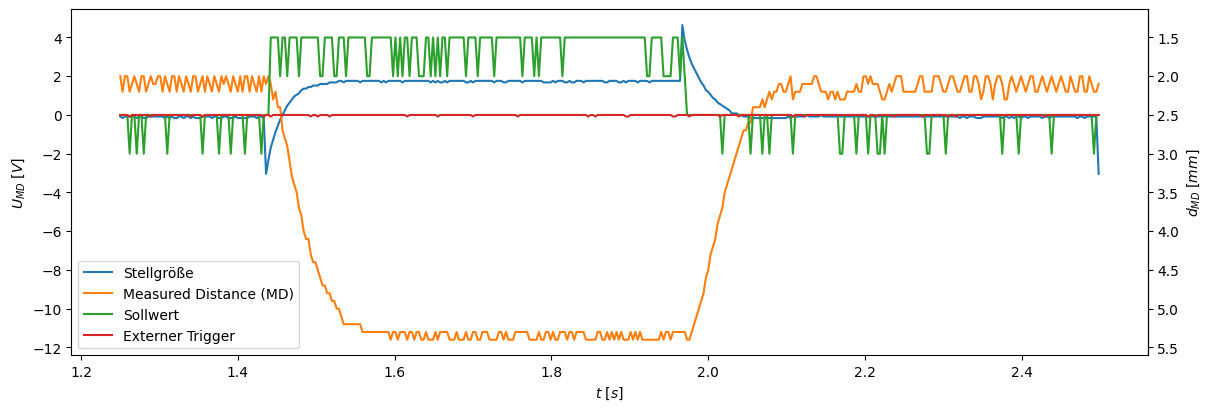

In [112]:
# get csv data
curr_path = os.path.join(DATA_PATH, '5.2.5')
channels = glob(os.path.join(curr_path, "*.csv"))

df = read_channels_data(channels, start=1.25, end=2.5)

# interpolate
df_interpol = interpolate_df(df)

# create plot
_, _, plot = create_plot(df_interpol)

plt.show()

## 5.2.6
Verbessern Sie durch Variieren der Parameter kP und kD das dynamische Verhalten der Regelung.
Dabei soll das Überschwingen und die bleibende Regelabweichung verringert werden. Welchen
Einfluss haben die beiden Parameter dabei jeweils?

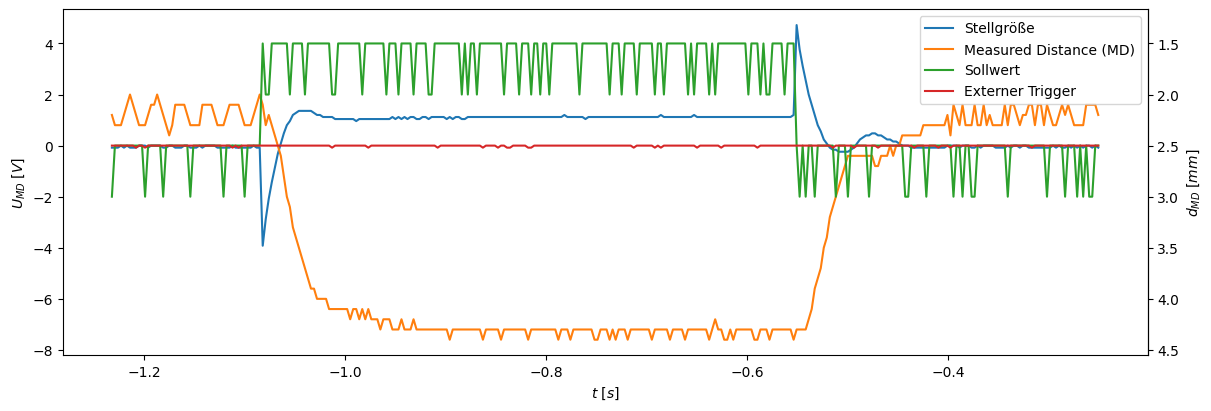

In [113]:
# get csv data
curr_path = os.path.join(DATA_PATH, '5.2.6')
channels = glob(os.path.join(curr_path, "*.csv"))

df = read_channels_data(channels, start=-1.25, end=-0.25)

# interpolate
df_interpol = interpolate_df(df)

# create plot
_, _, plot = create_plot(df_interpol)

plt.show()

## 5.3.11
Verbessern Sie durch Variieren der Parameter kP, kI und kD das dynamische Verhalten der
Regelung. Dabei soll das Überschwingen und die bleibende Regelabweichung möglichst klein
werden. Welchen Einfluss haben die Parameter dabei jeweils?

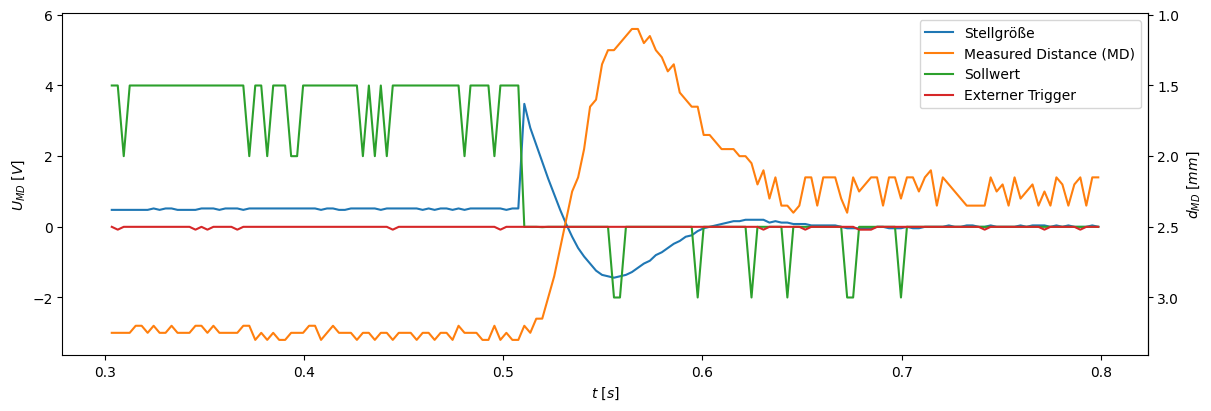

In [118]:
# get csv data
curr_path = os.path.join(DATA_PATH, '5.3.11')
channels = glob(os.path.join(curr_path, "*.csv"))

df = read_channels_data(channels, start=0.3, end=0.8)

# interpolate
df_interpol = interpolate_df(df)

# create plot
_, _, plot = create_plot(df_interpol)

plt.show()